In [1]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()       

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 98.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import fastbook
from fastai.vision.all import *
from fastbook import *

In [3]:
path = Path('/content/gdrive/MyDrive/TaskData1/')

In [4]:
fns = get_image_files(path)
fns

(#560) [Path('/content/gdrive/MyDrive/TaskData1/Black/Black/Copy of 18.PNG'),Path('/content/gdrive/MyDrive/TaskData1/Black/Black/b2774a54-7109-42d8-936c-3c7897261cca.jpg'),Path('/content/gdrive/MyDrive/TaskData1/Black/Black/7fdb6ff2-edca-42cf-a7a8-3a2ce09b65c7.jpg'),Path('/content/gdrive/MyDrive/TaskData1/Black/Black/Copy of 15.PNG'),Path('/content/gdrive/MyDrive/TaskData1/Black/Black/2b6ede57-d457-4ae7-acd4-dc307be56179.jpg'),Path('/content/gdrive/MyDrive/TaskData1/Black/Black/Copy of screenshot 56.jpg'),Path('/content/gdrive/MyDrive/TaskData1/Black/Black/b17bf770-5e89-4a73-8e07-cf93a9667ee1.jpg'),Path('/content/gdrive/MyDrive/TaskData1/Black/Black/Copy of 33.PNG'),Path('/content/gdrive/MyDrive/TaskData1/Black/Black/09be9938-b0bf-494f-a5cb-9685bdbf9db6.png'),Path('/content/gdrive/MyDrive/TaskData1/Black/Black/Copy of 43.PNG')...]

In [ ]:
# !unzip /content/gdrive/MyDrive/TaskData1/Black.zip -d /content/gdrive/MyDrive/TaskData1
# !unzip /content/gdrive/MyDrive/TaskData1/Normal.zip -d /content/gdrive/MyDrive/TaskData1

In [ ]:
path.ls()

(#7) [Path('/content/gdrive/MyDrive/TaskData1/Black'),Path('/content/gdrive/MyDrive/TaskData1/Black.zip'),Path('/content/gdrive/MyDrive/TaskData1/Normal.zip'),Path('/content/gdrive/MyDrive/TaskData1/Normal'),Path('/content/gdrive/MyDrive/TaskData1/black_normal_classifier_sample.pkl'),Path('/content/gdrive/MyDrive/TaskData1/.ipynb_checkpoints'),Path('/content/gdrive/MyDrive/TaskData1/black_normal_classifier.pkl')]

In [ ]:
Path.BASE_PATH =path

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    get_y =parent_label,
    splitter = RandomSplitter(valid_pct=0.2),
    item_tfms = Resize(256),
    batch_tfms = [*aug_transforms()],
)

In [ ]:
dls = dblock.dataloaders(path)

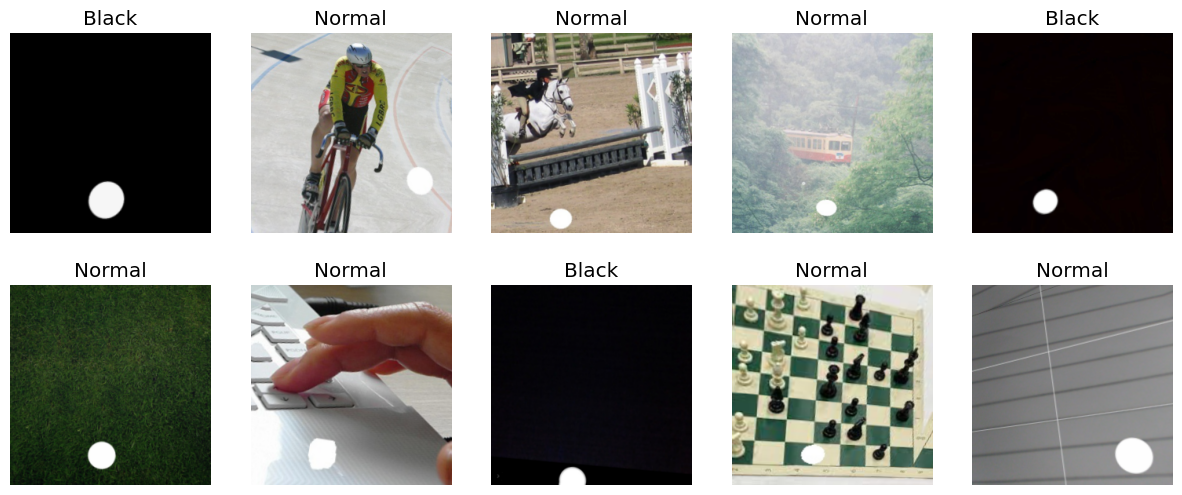

In [ ]:
dls.show_batch(max_n=10, nrows=2)

In [ ]:
learn = vision_learner(dls, resnet50, metrics=accuracy)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:
# learn.lr_find()

In [ ]:
learn.fine_tune(10, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.940166,0.378767,0.812500,01:09


epoch,train_loss,valid_loss,accuracy,time
0,0.175435,0.144978,0.964286,00:22
1,0.096886,0.015415,1.000000,00:20
2,0.070932,0.003245,1.000000,00:19
3,0.053579,0.002100,1.000000,00:20
4,0.041661,0.002283,1.000000,00:21
5,0.032336,0.001804,1.000000,00:19
6,0.025914,0.002429,1.000000,00:19
7,0.021218,0.003938,1.000000,00:21
8,0.017631,0.006241,1.000000,00:20
9,0.015894,0.005742,1.000000,00:20


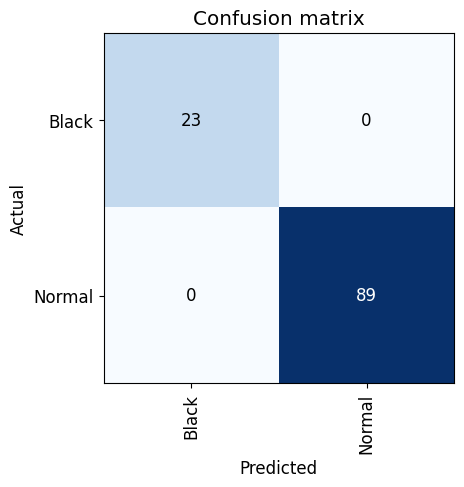

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

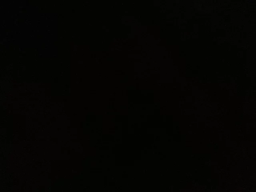

In [ ]:
img = PILImage.create(upload.data[-1])
img.to_thumb(256)

In [ ]:
pred, idx, prob = learn.predict(upload.data[-1])
print(f' {pred} - {prob[idx]}')

 Black - 1.0


In [ ]:
learn.export(path/'black_normal_classifier_test.pkl')



---

In [ ]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book() 
from fastai.vision.all import *
from fastbook import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
path = Path('/content/gdrive/MyDrive/TaskData1')

In [5]:
path.ls(file_exts='.pkl')

(#3) [Path('/content/gdrive/MyDrive/TaskData1/black_normal_classifier_sample.pkl'),Path('/content/gdrive/MyDrive/TaskData1/black_normal_classifier.pkl'),Path('/content/gdrive/MyDrive/TaskData1/black_normal_classifier_test.pkl')]

In [6]:
load_info = load_learner(path/'black_normal_classifier_test.pkl')

In [7]:
file = widgets.FileUpload()
file

FileUpload(value={}, description='Upload')

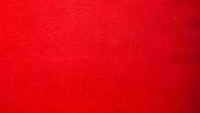

In [17]:
img = PILImage.create(file.data[-1])
img.to_thumb(200)


In [18]:
pred,idx,prob = load_info.predict(file.data[-1])
pred, prob[idx]

('Normal', tensor(1.0000))